In [2]:
#Udfra forskellige kriminal statistics 

In [3]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


C:\Users\jeffo\AppData\Local\Temp\ipykernel_19664\656318528.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Loading and Exploring the reported dataset:

In [4]:
#Load the dataset: purpose is to load the crime statistics dataset from a CSV file into a pandas DataFrame for analysis and modeling.
crime_data = pd.read_csv('reported.csv')

#Explore the dataset: Provides and initial look at the data to understand its structure, contents and some basic statistical summaries.
#crime_data.head(): shows the first few rows of the dataset to get a sense of the data values.
print("\nData efter head:")
print(crime_data.head())
#crime_data.describe(): Generates descriptive statistics that summarize the central tendency, dispersion and shape of the dataset's numercial features.
print("\nData efter describe:")
print(crime_data.describe())
#crime_data.info(): prints a concise summary of the DataFrame, including the number of non-null entries in each column, which helps identify missing values.
print("\nData efter info:")
print(crime_data.info())



Data efter head:
   Year  crimes.total  crimes.penal.code  crimes.person  murder  assault  \
0  1950          2784               2306            120       1      105   
1  1951          3284               2754            125       1      109   
2  1952          3160               2608            119       1      104   
3  1953          2909               2689            119       1      105   
4  1954          3028               2791            126       1      107   

   sexual.offenses  rape  stealing.general  burglary  ...  vehicle.theft  \
0               40     5              1578       295  ...            NaN   
1               45     6              1899       342  ...            NaN   
2               39     4              1846       372  ...            NaN   
3               45     5              1929       361  ...            NaN   
4               41     5              1981       393  ...            NaN   

   out.of.vehicle.theft  shop.theft  robbery  fraud  criminal.damage

In [5]:
# Data preprocessing
# Data preprocessing: Purpose is to handle missing values by replacing them with the median value of each column. 
# this is a common practice to prepare data for modeling without dropping rows or columns, preserving as much data as possible.
crime_data.fillna(crime_data.median(), inplace=True)  # Handling missing values by replacing them with median
crime_data


,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,...,vehicle.theft,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population
0,1950,2784,2306,120,1,105,40,5,1578,295,...,419.0,1210.0,606.0,3,209,72,477,0.0,49,7014000
1,1951,3284,2754,125,1,109,45,6,1899,342,...,419.0,1210.0,606.0,3,310,73,530,0.0,66,7073000
2,1952,3160,2608,119,1,104,39,4,1846,372,...,419.0,1210.0,606.0,3,217,82,553,0.0,78,7125000
3,1953,2909,2689,119,1,105,45,5,1929,361,...,419.0,1210.0,606.0,4,209,88,220,0.0,91,7171000
4,1954,3028,2791,126,1,107,41,5,1981,393,...,419.0,1210.0,606.0,4,236,101,237,0.0,103,7213000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2011,14988,12267,1005,2,947,181,69,5783,995,...,213.0,706.0,663.0,103,1220,1774,2721,946.0,314,9449000
62,2012,14734,12148,974,2,914,178,66,5613,922,...,169.0,655.0,635.0,97,1356,1600,2586,994.0,286,9519000
63,2013,14603,12072,896,3,837,184,63,5552,888,...,159.0,543.0,509.0,87,1545,1470,2532,1002.0,279,9644000
64,2014,14890,12305,923,3,859,210,69,5572,913,...,147.0,542.0,505.0,86,1610,1559,2585,983.0,271,9747000


In [6]:
# Define X and y based on your dataset
# Feature and Target Variable definition: Purpose to separates the dataset into features (X) and the target variable (Y). 
# the target variable (crimes.total)
# is what the model will predict, while X contains the features the model will use for making predictions. 
# The Year column is dropped from the features, assuming its not direcly used for prediction in this context, 
# possibly due to its role as en identifier rather than a predictive feature. 
X = crime_data.drop(['crimes.total', 'Year'], axis=1)  # Dropping 'Year' if not used as a feature
y = crime_data['crimes.total']
crime_data

,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,...,vehicle.theft,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population
0,1950,2784,2306,120,1,105,40,5,1578,295,...,419.0,1210.0,606.0,3,209,72,477,0.0,49,7014000
1,1951,3284,2754,125,1,109,45,6,1899,342,...,419.0,1210.0,606.0,3,310,73,530,0.0,66,7073000
2,1952,3160,2608,119,1,104,39,4,1846,372,...,419.0,1210.0,606.0,3,217,82,553,0.0,78,7125000
3,1953,2909,2689,119,1,105,45,5,1929,361,...,419.0,1210.0,606.0,4,209,88,220,0.0,91,7171000
4,1954,3028,2791,126,1,107,41,5,1981,393,...,419.0,1210.0,606.0,4,236,101,237,0.0,103,7213000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2011,14988,12267,1005,2,947,181,69,5783,995,...,213.0,706.0,663.0,103,1220,1774,2721,946.0,314,9449000
62,2012,14734,12148,974,2,914,178,66,5613,922,...,169.0,655.0,635.0,97,1356,1600,2586,994.0,286,9519000
63,2013,14603,12072,896,3,837,184,63,5552,888,...,159.0,543.0,509.0,87,1545,1470,2532,1002.0,279,9644000
64,2014,14890,12305,923,3,859,210,69,5572,913,...,147.0,542.0,505.0,86,1610,1559,2585,983.0,271,9747000


In [13]:
# Data Cleaning for missing values
#Purpose an alternative approach to handling missing values by replacing them with the mean of each column.
data_cleaned = crime_data.fillna(crime_data.mean())

In [14]:
# Udskriv datasættet efter imputation
print("\nData efter imputation:")
print(data_cleaned)


Data efter imputation:
    Year  crimes.total  crimes.penal.code  crimes.person  murder  assault  \
0   1950          2784               2306            120       1      105   
1   1951          3284               2754            125       1      109   
2   1952          3160               2608            119       1      104   
3   1953          2909               2689            119       1      105   
4   1954          3028               2791            126       1      107   
..   ...           ...                ...            ...     ...      ...   
61  2011         14988              12267           1005       2      947   
62  2012         14734              12148            974       2      914   
63  2013         14603              12072            896       3      837   
64  2014         14890              12305            923       3      859   
65  2015         15342              12803            932       3      868   

    sexual.offenses  rape  stealing.general  burgla

In [20]:
# Hvis du ikke allerede har fjernet disse kolonner, skal du kontrollere kolonnenavne først
print("Column names before removal:")
print(crime_data.columns)

# Kontroller om kolonnerne eksisterer, før du forsøger at fjerne dem
columns_to_remove = ['vehicle.theft', 'out.of.vehicle.theft', 'shop.theft']
existing_columns = set(crime_data.columns)
columns_to_remove = [col for col in columns_to_remove if col in existing_columns]

# Håndter manglende værdier i de fundne kolonner
if columns_to_remove:
    data = crime_data.drop(columns_to_remove, axis=1)
    print(f"\nColumns {columns_to_remove} removed successfully.")
else:
    print("\nColumns not found in the dataset.")

# Tjek kolonnenavne efter fjernelse
print("\nColumn names after removal:")
print(data.columns)




Column names before removal:
Index(['Year', 'crimes.total', 'crimes.penal.code', 'crimes.person', 'murder',
       'assault', 'sexual.offenses', 'rape', 'stealing.general', 'burglary',
       'house.theft', 'vehicle.theft', 'out.of.vehicle.theft', 'shop.theft',
       'robbery', 'fraud', 'criminal.damage', 'other.penal.crimes',
       'narcotics', 'drunk.driving', 'population'],
      dtype='object')

Columns ['vehicle.theft', 'out.of.vehicle.theft', 'shop.theft'] removed successfully.

Column names after removal:
Index(['Year', 'crimes.total', 'crimes.penal.code', 'crimes.person', 'murder',
       'assault', 'sexual.offenses', 'rape', 'stealing.general', 'burglary',
       'house.theft', 'robbery', 'fraud', 'criminal.damage',
       'other.penal.crimes', 'narcotics', 'drunk.driving', 'population'],
      dtype='object')


In [21]:
crime_data

,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,...,vehicle.theft,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population
0,1950,2784,2306,120,1,105,40,5,1578,295,...,419.0,1210.0,606.0,3,209,72,477,0.0,49,7014000
1,1951,3284,2754,125,1,109,45,6,1899,342,...,419.0,1210.0,606.0,3,310,73,530,0.0,66,7073000
2,1952,3160,2608,119,1,104,39,4,1846,372,...,419.0,1210.0,606.0,3,217,82,553,0.0,78,7125000
3,1953,2909,2689,119,1,105,45,5,1929,361,...,419.0,1210.0,606.0,4,209,88,220,0.0,91,7171000
4,1954,3028,2791,126,1,107,41,5,1981,393,...,419.0,1210.0,606.0,4,236,101,237,0.0,103,7213000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2011,14988,12267,1005,2,947,181,69,5783,995,...,213.0,706.0,663.0,103,1220,1774,2721,946.0,314,9449000
62,2012,14734,12148,974,2,914,178,66,5613,922,...,169.0,655.0,635.0,97,1356,1600,2586,994.0,286,9519000
63,2013,14603,12072,896,3,837,184,63,5552,888,...,159.0,543.0,509.0,87,1545,1470,2532,1002.0,279,9644000
64,2014,14890,12305,923,3,859,210,69,5572,913,...,147.0,542.0,505.0,86,1610,1559,2585,983.0,271,9747000


Model training and evaluation:
Purpose: This section covers splitting the data into training and test sets, feature scaling, training different machine learning models (Linear Regression, Random Forest Regressor, and SVR), and evaluating these models based on Mean Squared Error (MSE) and R-squared (R²) metrics.
S Splitting the data helps in evaluating the model on unseen data   Scaling features is essential for models that are sensitive to the scale of the data, like SV    Training multiple models and comparing their performance helps in selecting the best model for making predictions.

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
# Data normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
#Model training
#Adjusting models for regression task
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'SVR': SVR()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f'{name} trained.')

#Model evaluation
for name, model in models.items():
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f'{name} - MSE: {mse}, R^2: {r2}')

Linear Regression trained.
Random Forest Regressor trained.
SVR trained.
Linear Regression - MSE: 166.0561597796058, R^2: 0.9999922665254575
Random Forest Regressor - MSE: 141708.46073500006, R^2: 0.9934004328715254
SVR - MSE: 32550084.81362667, R^2: -0.5159043338053568


In [28]:
from sklearn.ensemble import RandomForestRegressor
import joblib

# Example model training
model = RandomForestRegressor(random_state=42)
# Fit model on your training data
model.fit(X_train_scaled, y_train)

# Save the model to file
joblib.dump(model, 'model.joblib')


['model.joblib']

Explain what ‘overfitting’ means and how you can spot it: 

Overfitting happens when a model learns the training data too closely, including its noise and outliers, leading to poor performance on new data. Signs include significantly better accuracy on training data than on validation or test data. To prevent overfitting, consider using simpler models, regularization techniques, or reducing the number of features.

Explain what hyperparameters you have adjusted and why:

Adjusting hyperparameters, like the number of trees in a RandomForestRegressor or the depth of these trees, can improve model performance or address overfitting. The aim is to fine-tune these parameters to enhance the model's ability to generalize well to unseen data.

Explain how you have measured quality using F1 score and explain the terms 
accuracy, precision and recall (sensitivity). 

Model quality is often assessed using metrics such as F1 score, accuracy, precision, and recall:

Accuracy measures the proportion of all classifications that were correct.
Precision is the ratio of correctly predicted positive observations to all predicted positives, useful when the cost of false positives is high.
Recall (or sensitivity) measures how many actual positives the model correctly identified, important when missing a positive is costly.
F1 Score combines precision and recall into a single metric that balances both, useful for imbalanced classes.

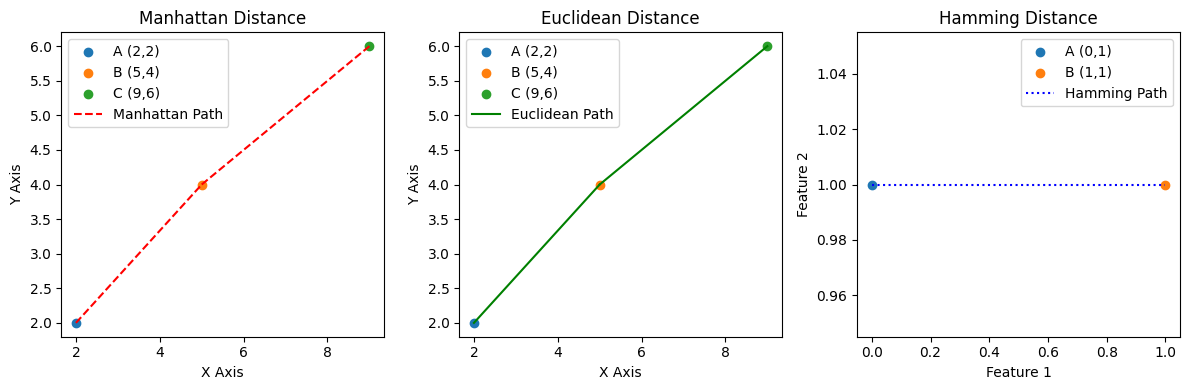

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Example data points for visualization
points = np.array([[2, 2], [5, 4], [9, 6]])
labels = ['A (2,2)', 'B (5,4)', 'C (9,6)']

# Plot for Manhattan Distance
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
for point, label in zip(points, labels):
    plt.scatter(point[0], point[1], label=label)
plt.plot([2, 5], [2, 4], 'r--', label='Manhattan Path')
plt.plot([5, 9], [4, 6], 'r--')
plt.title('Manhattan Distance')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()

# Plot for Euclidean Distance
plt.subplot(1, 3, 2)
for point, label in zip(points, labels):
    plt.scatter(point[0], point[1], label=label)
plt.plot([2, 5], [2, 4], 'g-', label='Euclidean Path')
plt.plot([5, 9], [4, 6], 'g-')
plt.title('Euclidean Distance')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()

# Plot for Hamming Distance
# For simplicity, we consider points A and B only and assume binary features to illustrate Hamming distance
# Assuming A and B have binary representations in some feature space: A = (0, 1), B = (1, 1)
# The plot will just illustrate two points with their "binary" differences highlighted

# Convert points to a simple binary representation for illustration
binary_points = np.array([[0, 1], [1, 1]])
binary_labels = ['A (0,1)', 'B (1,1)']

plt.subplot(1, 3, 3)
for point, label in zip(binary_points, binary_labels):
    plt.scatter(point[0], point[1], label=label)
plt.plot([0, 1], [1, 1], 'b:', label='Hamming Path')
plt.title('Hamming Distance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()


Distance Metrics Visualization:

Illustrates the concepts of different distance metrics through matplotlib plots. Each plot demonstrates how distances between points can be calculated differently based on the metric used, providing a visual understanding of these fundamental concepts in data science and machine learning.

    Manhattan Distance: Imagine a grid layout, like city blocks. To move from one point to another, you can only move along the grid lines (no diagonals). The Manhattan distance is the total number of blocks moved horizontally and vertically to get from the start to the end point. Visually, it would look like a path made of right angles.

    Euclidean Distance: This is the "straight-line" distance between two points in space. If you could draw a line directly from one point to another, the length of this line would be the Euclidean distance. On a plot, it's the hypotenuse of a right-angled triangle formed by the two points.

    Hamming Distance: This measures the difference between two strings of equal length by counting the number of positions at which the corresponding symbols are different. It’s not about physical distance in space but about differences in characteristics or features. Visually, for binary strings, you might imagine two rows of bits with lines connecting the differing bits.

For the Manhattan and Euclidean distances, the visualizations would typically involve plotting points on a 2D graph and showing how the distances are calculated - for Manhattan distance, by summing the absolute differences along each dimension (like drawing a path through a grid), and for Euclidean distance, by measuring the straight line (direct path) between two points.

The Hamming distance, which measures the difference between two binary strings or categorical data, isn't easily visualized on a 2D Euclidean space as it involves counting the number of positions at which the corresponding symbols are different.

Despite this hiccup, the concepts for these distances are straightforward:

    Manhattan Distance (L1 norm) is useful in grid-like path calculations where movement is allowed only in orthogonal directions (up, down, left, right).
    Euclidean Distance (L2 norm) is most appropriate for measuring the straight-line distance between points in space, representing the shortest path.
    Hamming Distance is crucial in error detection/correction algorithms, coding theory, and for comparing categorical data, indicating how many substitutions it would take to change one string into the other or the number of differing elements between two sequences.

Each measure is chosen based on the problem's nature and the data structure, aiming to provide the most accurate representation of "distance" or "difference" under specific conditions.

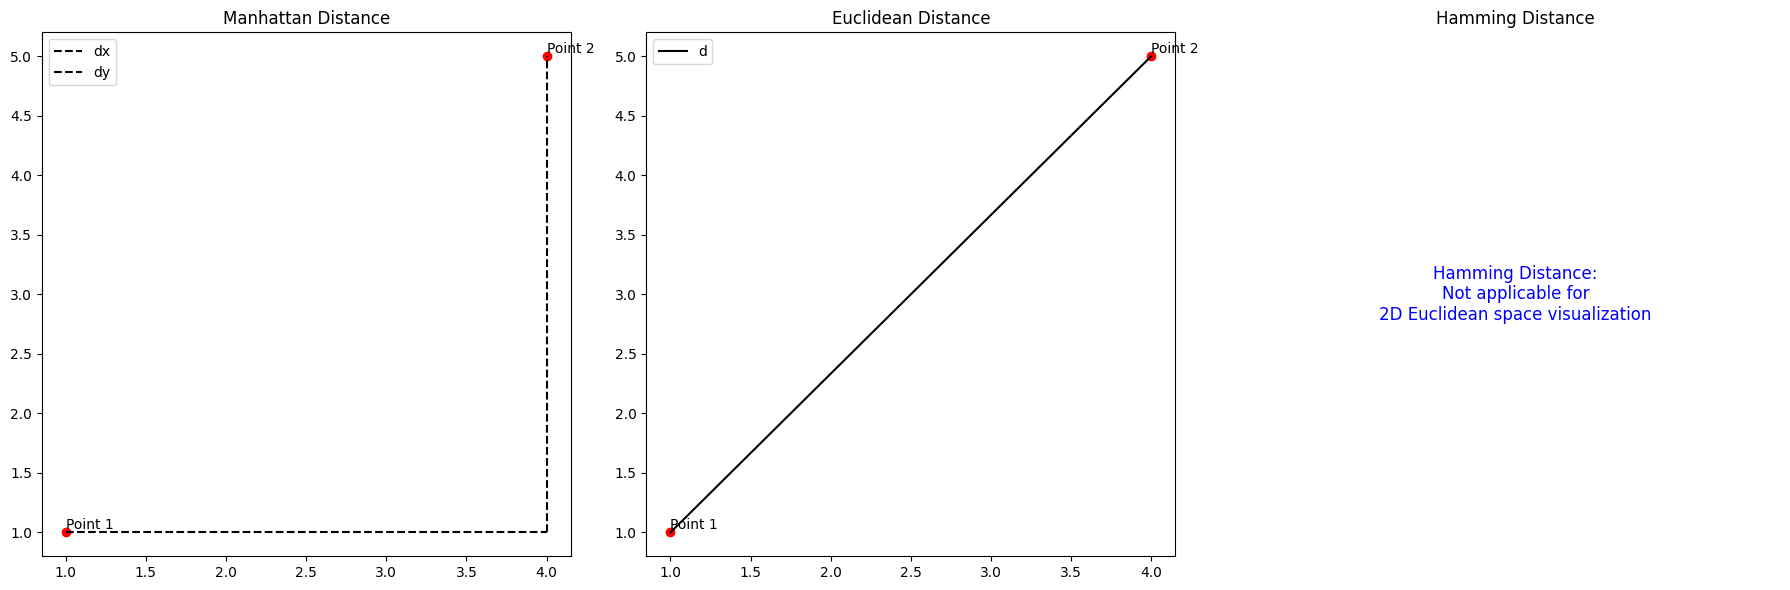

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Set up figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Points for demonstration
point1 = np.array([1, 1])
point2 = np.array([4, 5])

# Manhattan Distance
axs[0].plot([point1[0], point2[0]], [point1[1], point1[1]], 'k--', label='dx')
axs[0].plot([point2[0], point2[0]], [point1[1], point2[1]], 'k--', label='dy')
axs[0].scatter([point1[0], point2[0]], [point1[1], point2[1]], color='red')
axs[0].text(point1[0], point1[1], 'Point 1', verticalalignment='bottom')
axs[0].text(point2[0], point2[1], 'Point 2', verticalalignment='bottom')
axs[0].set_title('Manhattan Distance')
axs[0].legend()

# Euclidean Distance
axs[1].plot([point1[0], point2[0]], [point1[1], point2[1]], 'k-', label='d')
axs[1].scatter([point1[0], point2[0]], [point1[1], point2[1]], color='red')
axs[1].text(point1[0], point1[1], 'Point 1', verticalalignment='bottom')
axs[1].text(point2[0], point2[1], 'Point 2', verticalalignment='bottom')
axs[1].set_title('Euclidean Distance')
axs[1].legend()

# Hamming Distance visualization not applicable in a 2D Euclidean space.
# It's calculated for binary/categorical data, thus no visual demo here.
# Placeholder text to explain Hamming Distance.
axs[2].text(0.5, 0.5, 'Hamming Distance:\nNot applicable for\n2D Euclidean space visualization', 
            horizontalalignment='center', verticalalignment='center',
            fontsize=12, color='blue')
axs[2].set_title('Hamming Distance')
axs[2].axis('off')

plt.tight_layout()
plt.show()
